In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("./Default1.xlsx")
display(data)

,Unnamed: 0,default,student,balance,income
0,1,No,Yes,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


In [3]:
display(data.isnull().sum())

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

In [4]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


None

In [5]:
display(data.describe())

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462903
50%,5000.50000,823.636973,34552.644802
75%,7500.25000,1166.308386,43807.729272
max,10000.00000,2654.322576,73554.233495


In [6]:
data.describe(include='all')

,Unnamed: 0,default,student,balance,income
count,10000.00000,10000,10000,10000.000000,10000.000000
unique,NaN,2,2,NaN,NaN
top,NaN,No,No,NaN,NaN
freq,NaN,9667,7055,NaN,NaN
mean,5000.50000,NaN,NaN,835.374886,33516.981876
std,2886.89568,NaN,NaN,483.714985,13336.639563
min,1.00000,NaN,NaN,0.000000,771.967729
25%,2500.75000,NaN,NaN,481.731105,21340.462903
50%,5000.50000,NaN,NaN,823.636973,34552.644802
75%,7500.25000,NaN,NaN,1166.308386,43807.729272


In [12]:
(data.balance == 0).sum()

499

In [13]:
data.student.value_counts()

No     7055
Yes    2945
Name: student, dtype: int64

In [14]:
data.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [15]:
data['default2'] = data.default.factorize()[0]
data['student2'] = data.student.factorize()[0]
data.head(5)

,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,Yes,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,0
2,3,No,No,1073.549164,31767.138947,0,1
3,4,No,No,529.250605,35704.493935,0,1
4,5,No,No,785.655883,38463.495879,0,1


In [16]:
data_dfno = data[data.default2 == 0].sample(frac = 0.15)
data_dfyes = data[data.default2 == 1]
data_df = data_dfno.append(data_dfyes)
data_df.head(3)

C:\Users\student\AppData\Local\Temp\ipykernel_11148\3594775099.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_dfno.append(data_dfyes)


,Unnamed: 0,default,student,balance,income,default2,student2
602,603,No,No,1246.037758,33691.721309,0,1
9539,9540,No,No,132.730902,33370.834343,0,1
661,662,No,Yes,732.264268,21986.045454,0,0


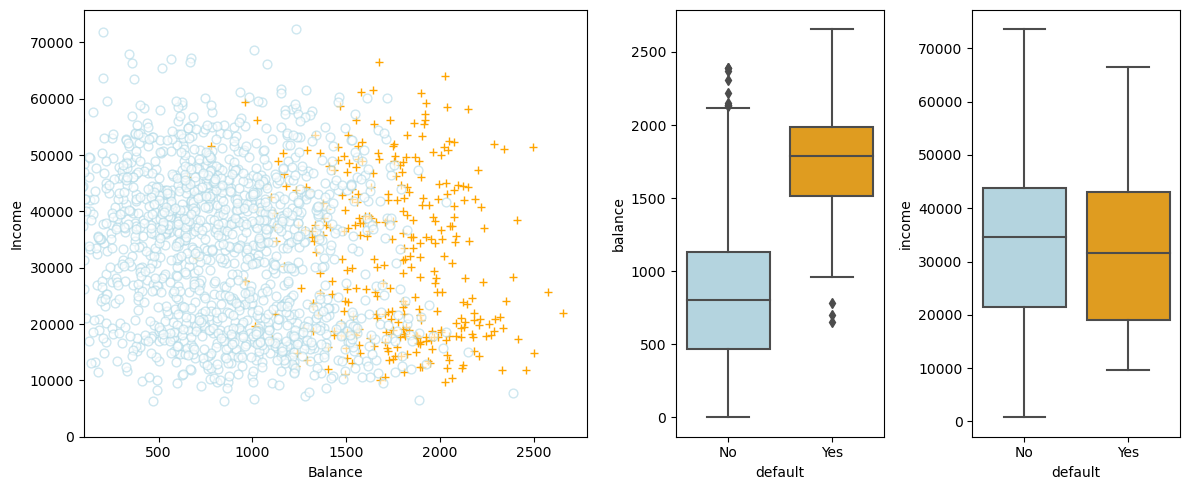

In [17]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1,4)
ax1 = plt.subplot(gs[0,:2])
ax2 = plt.subplot(gs[0,2:3])
ax3 = plt.subplot(gs[0,3:4])

ax1.scatter(data_df[data_df.default == 'Yes'].balance, data_df[data_df.default == 'Yes'].income, s=40,c='orange', marker='+', linewidth=1)
ax1.scatter(data_df[data_df.default == 'No'].balance, data_df[data_df.default == 'No'].income, s=40, marker='o', linewidth=1, edgecolors='lightblue', facecolors='white', alpha=.6)

ax1.set_ylim(ymin = 0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin = 100)
ax1.set_xlabel('Balance')

c_palette = {'No': 'lightblue', 'Yes': 'orange'}

sns.boxplot(x=data['default'], y=data['balance'], data=data, orient='v', ax=ax2, palette=c_palette)
sns.boxplot(x=data['default'], y=data['income'], data=data, orient='v', ax=ax3, palette=c_palette)

gs.tight_layout(plt.gcf())
plt.show()

### Logistic Regresstion Using sklearn

In [18]:
x_train = data.balance.values.reshape(-1,1)
y = data.default2
x_test = np.arange(data.balance.min(), data.balance.max()).reshape(-1,1)
x_test

array([[0.000e+00],
       [1.000e+00],
       [2.000e+00],
       ...,
       [2.652e+03],
       [2.653e+03],
       [2.654e+03]])

In [19]:
import sklearn.linear_model as skl_lm

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(x_train, y)

LogisticRegression(solver='newton-cg')

In [20]:
prob = clf.predict_proba(x_test)
prob

array([[9.99976331e-01, 2.36688332e-05],
       [9.99976201e-01, 2.37993415e-05],
       [9.99976069e-01, 2.39305694e-05],
       ...,
       [1.92313398e-02, 9.80768660e-01],
       [1.91278958e-02, 9.80872104e-01],
       [1.90249974e-02, 9.80975003e-01]])

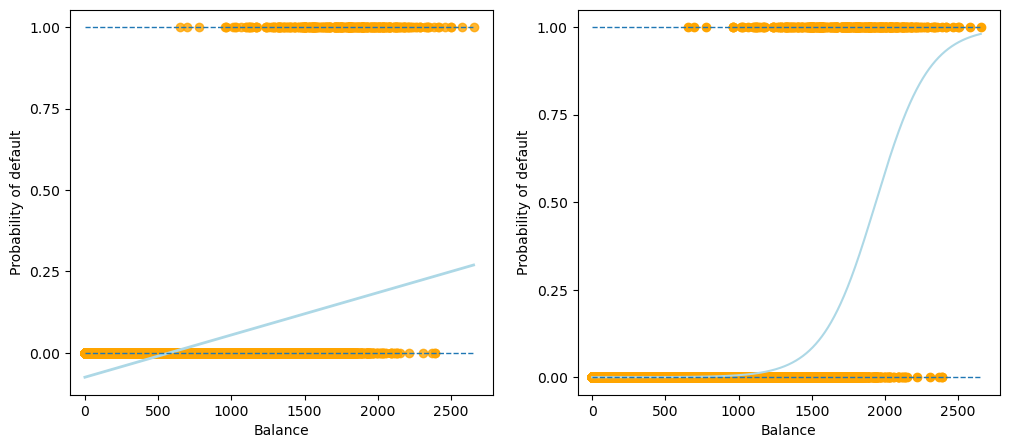

In [21]:



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.regplot(x = data.balance, y=data.default2, order=1, ci=None, scatter_kws={'color':'orange'}, line_kws={'color':'lightblue', 'lw':2},ax=ax1)

ax2.scatter(x_train, y, color='orange')
ax2.plot(x_test, prob[:, 1], color='lightblue')

for ax in fig.axes :
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0], xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0], xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
        
    ax.set_ylabel('Probability of default')    
    ax.set_xlabel('Balance')
    ax.set_yticks([0 ,0.25 ,0.5, 0.75, 1])
    ax.set_xlim(xmin=-100)

In [22]:
print(clf)
print('classes: ', clf.classes_)
print('coefficients: ', clf.coef_)
print('intercept: ', clf.intercept_)

LogisticRegression(solver='newton-cg')
classes:  [0 1]
coefficients:  [[0.00549892]]
intercept:  [-10.65132776]


In [23]:
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as sms

x_train = sm.add_constant(data.balance)
est = sm.Logit(y.ravel(), x_train).fit()

est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


In [24]:

x_train = sm.add_constant(data.student2)
y = data.default2
est = sm.Logit(y, x_train).fit()

est.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.145436
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
const,-3.0996,0.091,-34.169,0.000,-3.277,-2.922
student2,-0.4044,0.115,-3.516,0.000,-0.630,-0.179


### Multipal Logistic Regression

In [25]:
x_train = sm.add_constant(data[['balance', 'income', 'student2']])
est = sm.Logit(y, x_train).fit()

est.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,coef,std err,z,P>|z|,[0.025,0.975]
const,-11.5158,0.438,-26.299,0.000,-12.374,-10.658
balance,0.0057,0.000,24.736,0.000,0.005,0.006
income,3.033e-06,8.2e-06,0.370,0.712,-1.3e-05,1.91e-05
student2,0.6468,0.236,2.738,0.006,0.184,1.110


### Confounding

In [26]:
x_train = data[data.student == 'Yes'].balance.values.reshape(-1,1)
y = data[data.student == 'Yes'].default2

x_train2 = data[data.student == 'No'].balance.values.reshape(-1,1)
y2 = data[data.student == 'No'].default2

x_test = np.arange(data.balance.min(), data.balance.max()).reshape(-1, 1)

x_test

array([[0.000e+00],
       [1.000e+00],
       [2.000e+00],
       ...,
       [2.652e+03],
       [2.653e+03],
       [2.654e+03]])

In [27]:
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf2 = skl_lm.LogisticRegression(solver='newton-cg')

display(clf.fit(x_train, y))
display(clf2.fit(x_train2, y2))

LogisticRegression(solver='newton-cg')

LogisticRegression(solver='newton-cg')

In [28]:
prob = clf.predict_proba(x_test)
prob2 = clf2.predict_proba(x_test)

data.groupby(['student', 'default']).size().unstack('default')

default,No,Yes
student,,
No,6849,206
Yes,2818,127


<Axes: xlabel='student', ylabel='balance'>

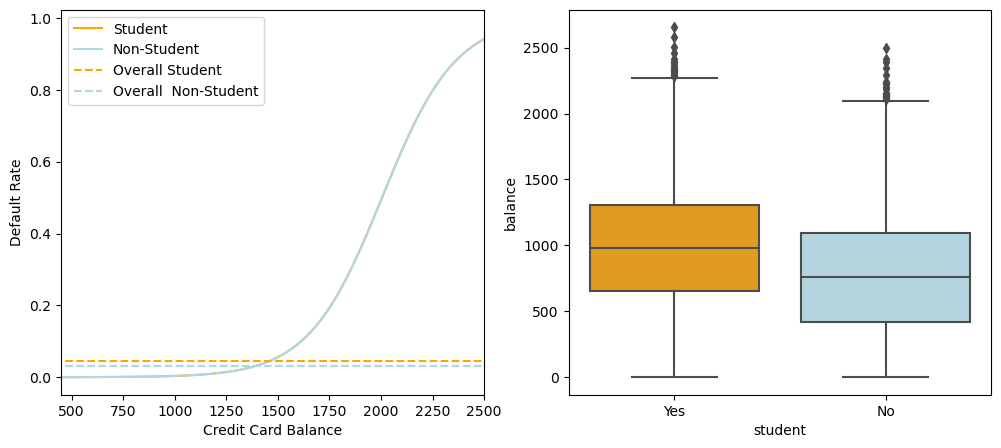

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(x_test, prob[:, 1], color='orange', label='Student')
ax1.plot(x_test, prob[:, 1], color='lightblue', label='Non-Student')

ax1.hlines(127/2817, colors='orange', label='Overall Student', xmin=ax1.xaxis.get_data_interval()[0], xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.hlines(206/6850, colors='lightblue', label='Overall  Non-Student', xmin=ax1.xaxis.get_data_interval()[0], xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax1.set_xlim(450, 2500)
ax1.legend(loc=2)

sns.boxplot(x='student', y='balance', data=data, orient='v', ax=ax2, palette=c_palette)

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

x = data[['balance', 'income', 'student2']]
y = data.default2

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(x, y).predict(x)

data_df = pd.DataFrame({'True Default Status': y, 'Predicted Default Status': y_pred})

data_df.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
data_df.groupby(['Predicted Default Status', 'True Default Status']).size().unstack('True Default Status')

True Default Status,No,Yes
Predicted Default Status,,
No,9645,254
Yes,22,79


In [40]:
# 20% Threshold

decision_Prid = 0.2
y_prid = lda.fit(x, y).predict_proba(x)

data_df = pd.DataFrame({'True Default Status': y, 'Predicted Default Status': y_prid[:, 1]>decision_Prid})
data_df.replace(to_replace={0:'No', 1:'Yes', 'True':'Yes', 'False':'No'}, inplace=True)
data_df.groupby(['Predicted Default Status', 'True Default Status']).size().unstack('True Default Status')

True Default Status,No,Yes
Predicted Default Status,,
False,9435,140
True,232,193
